   Unnamed: 0  user_id user_country gender ios_or_android       test_group  \
0         NaN  1041787          DEU      F              I    Control Group   
1         NaN  1022805          GBR      M              I  Treatment Group   
2         NaN  1008085          USA      M              A    Control Group   
3         NaN  1009288          BRA      F              I  Treatment Group   
4         NaN  1001037          USA      F              I  Treatment Group   
5         NaN  1023745          BRA      F              I  Treatment Group   
6         NaN  1009810          BRA      F              I    Control Group   
7         NaN  1003941          MEX    NaN            NaN    Control Group   
8         NaN  1025097          GBR      F              A  Treatment Group   
9         NaN  1017574          BRA      F              A  Treatment Group   

   sum_money_spent  conv_or_not  
0      1659.400000            1  
1      1546.300000            1  
2      1266.800000            1  
3    

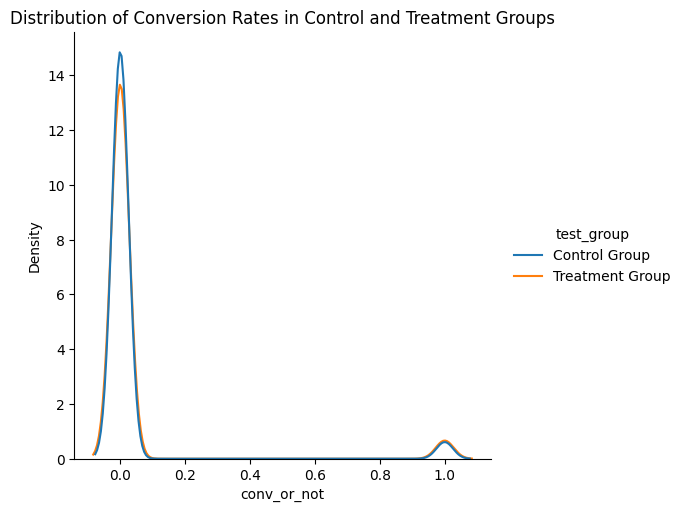

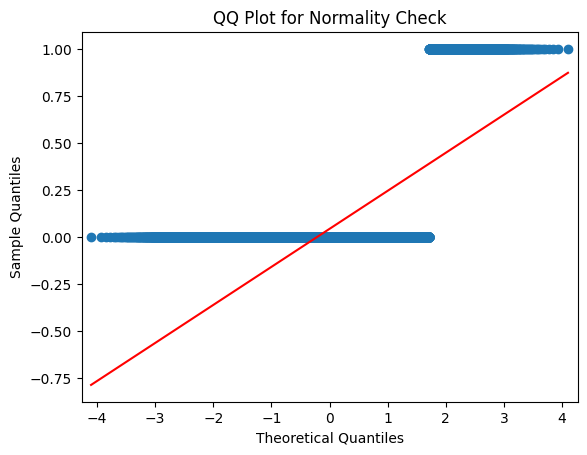

Test Statistic (Z): -3.8643
P-value: 0.0001
The result of the z-test are: 
Reject the null hypothesis. There is a significant difference in conversion rates.

Task 2 - Calculate the confidence interval 
95% Confidence Interval for the Difference in Conversion Rates: (0.0437, 0.0489)

Task 3 - Hypothesis Test for Amount Spent per User
Control Group: Average amount spent per user: 3.374518467928841 Standard Deviation: 25.93639055722059 Sample Size: 24343
Treatment Group: Average amount spent per user: 3.390866945885783 Standard Deviation: 25.414109599225664 Sample Size: 24600
Cohen's d: 0.0006
Required Sample Size for each group: 38721865


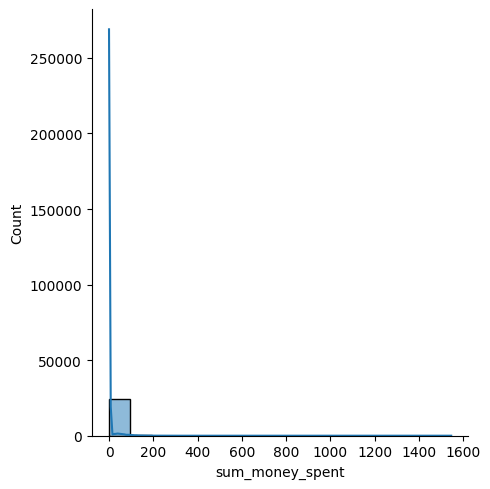

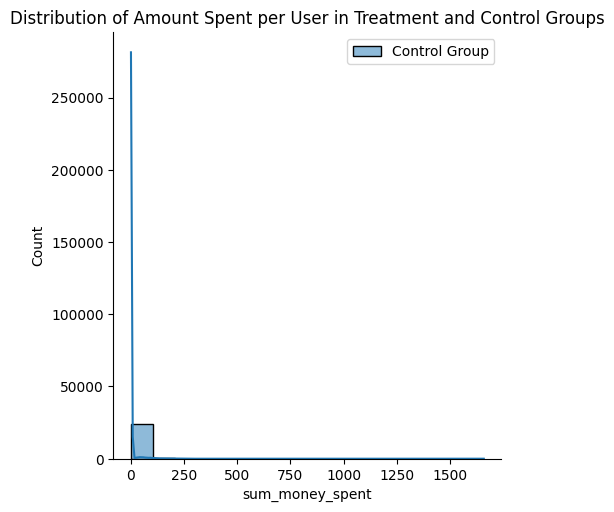

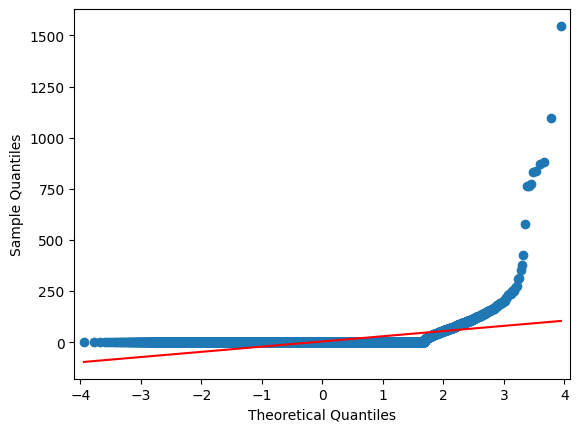

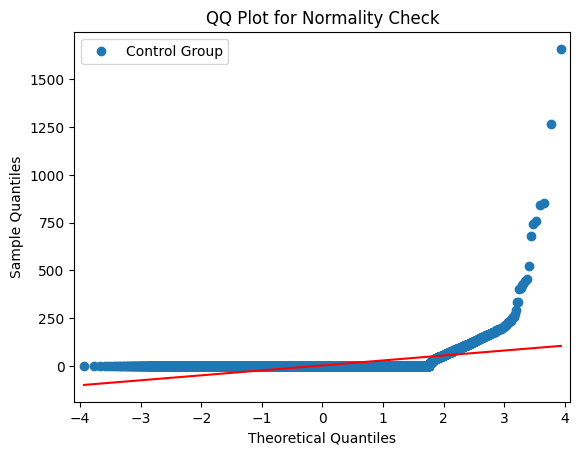

Test Statistic (t): 0.0704
P-value: 0.9439
The result of the t-test are: 
Fail to reject the null hypothesis. There is no significant difference in conversion rates.

Task 4: Calculate the confidence interval
95% Confidence Interval for the Difference in Average Amount Spent per User: (-0.4386, 0.4713)


In [ ]:

import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from statsmodels.stats.power import TTestIndPower
from statsmodels.graphics.gofplots import qqplot

# Load the dataset
data = pd.read_csv('/content/globox_27_1_24.csv')
print(data.head(10))

# Task 1: Hypothesis Test for Conversion Rate
# Null Hypothesis (H0): The conversion rates in the Control Group and Treatment Group are the same.
# Alternative Hypothesis (H1): There is a difference in the conversion rates between the two groups.

print("Task 1: Hypothesis Test for Conversion Rate:")

# Calculate conversion rates per group
control_conversion_rate = data[data['test_group'] == 'Control Group']['conv_or_not'].mean()
treatment_conversion_rate = data[data['test_group'] == 'Treatment Group']['conv_or_not'].mean()

# Calculate sample sizes
control_sample_size = len(data[data['test_group'] == 'Control Group'])
treatment_sample_size = len(data[data['test_group'] == 'Treatment Group'])

# Print conversion rates and sample sizes
print("Control Group: Conversion Rate:", round(control_conversion_rate, 4), "Sample Size:", control_sample_size)
print("Treatment Group: Conversion Rate:", round(treatment_conversion_rate, 4), "Sample Size:", treatment_sample_size)

# Power Analysis for Task 1
# Perform power analysis to determine the required sample size for detecting a
# meaningful difference in conversion rates between the treatment and control groups.

# Determine the parameters for the power analysis
alpha = 0.05   # for 95% confident level
power = 0.8    # the most common power

effect_size = np.abs(control_conversion_rate - treatment_conversion_rate) # The effect size is calculated as the absolute difference in conversion rates between the treatment and control groups.


# Create a NormalIndPower object for power analysis
power_analysis = TTestIndPower()

# Calculate required sample size for a given effect size, alpha, and power
required_sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')

# Display required sample size
print(f'Required Sample Size for each group: {required_sample_size:.0f}')

# Check normality of samples and visualize for Task 1
sns.displot(data=data, x='conv_or_not', hue='test_group', kind='kde', common_norm=False)
plt.title('Distribution of Conversion Rates in Control and Treatment Groups')
plt.show()

# Perform QQ plot for normality check for Task 1
qqplot(data['conv_or_not'], line='s')
plt.title('QQ Plot for Normality Check')
plt.show()

# Perform Two-sample Z-test for proportions
count = np.array([data[data['test_group'] == 'Control Group']['conv_or_not'].sum(),
                  data[data['test_group'] == 'Treatment Group']['conv_or_not'].sum()])
nobs = np.array([control_sample_size, treatment_sample_size])

# Two-sample Z-test
z_stat, p_value = proportions_ztest(count, nobs)

# Display results
print(f'Test Statistic (Z): {z_stat:.4f}')
print(f'P-value: {p_value:.4f}')

print("The result of the z-test are: ")
# Check significance at 5% level and draw a conclusion
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in conversion rates.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in conversion rates.")


print()
print("Task 2 - Calculate the confidence interval ")
# Task 2 - Calculate the confidence interval for the difference in conversion rates

control_successes = data[data['test_group'] == 'Control Group']['conv_or_not'].sum()
treatment_successes = data[data['test_group'] == 'Treatment Group']['conv_or_not'].sum()
conf_interval = proportion_confint(count=[treatment_successes, control_successes], nobs=[treatment_sample_size, control_sample_size], alpha=alpha, method='normal')

# Display confidence interval
print(f'95% Confidence Interval for the Difference in Conversion Rates: ({conf_interval[0][0]:.4f}, {conf_interval[1][0]:.4f})')



print()
print("Task 3 - Hypothesis Test for Amount Spent per User")

# Task 3: Hypothesis Test and Confidence Interval for Amount Spent per User
# Null Hypothesis: There is no difference in the average amount spent per user between the treatment and control groups.
# Alternative Hypothesis: There is a difference in the average amount spent per user between the treatment and control groups.

# Split data into treatment and control groups
treatment_data = data[data['test_group'] == 'Treatment Group']['sum_money_spent']
control_data = data[data['test_group'] == 'Control Group']['sum_money_spent']

# Calculate mean and standard deviation for each group
mean_treatment = treatment_data.mean()
mean_control = control_data.mean()
std_treatment = treatment_data.std()
std_control = control_data.std()


# Display mean, standard deviation, and sample sizes
print("Control Group: Average amount spent per user:", mean_control, "Standard Deviation:", std_control, "Sample Size:", control_sample_size)
print("Treatment Group: Average amount spent per user:", mean_treatment, "Standard Deviation:", std_treatment, "Sample Size:", treatment_sample_size)

# Power Analysis for Task 3
# Calculate Cohen's d to measure the effect size, which quantifies the difference
# between the means of the treatment and control groups relative to their pooled standard deviation.
# Cohen's d helps interpret the practical significance of the difference in average amount spent per user.

pooled_std = np.sqrt((std_treatment**2 + std_control**2) / 2)
cohen_d = (mean_treatment - mean_control) / pooled_std

# Display Cohen's d
print(f"Cohen's d: {cohen_d:.4f}")

# Calculate required sample size for a given effect size, alpha, and power
required_sample_size = power_analysis.solve_power(effect_size=cohen_d, alpha=alpha, power=power, alternative='two-sided')

# Display required sample size
print(f'Required Sample Size for each group: {required_sample_size:.0f}')

# Check normality of samples and visualize for Task 3
sns.displot(data=treatment_data, kde=True, label='Treatment Group')
sns.displot(data=control_data, kde=True, label='Control Group')
plt.title('Distribution of Amount Spent per User in Treatment and Control Groups')
plt.legend()
plt.show()

# Perform QQ plot for normality check for Task 3
qqplot(treatment_data, line='s', label='Treatment Group')
qqplot(control_data, line='s', label='Control Group')
plt.title('QQ Plot for Normality Check')
plt.legend()
plt.show()

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(treatment_data, control_data, equal_var=False)

# Display results
print(f'Test Statistic (t): {t_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

print("The result of the t-test are: ")
# Draw a conclusion
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in conversion rates.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in conversion rates.")

print()
print("Task 4: Calculate the confidence interval")
# Task 4: Calculate the confidence interval for the difference of amount spent per usen in groups

# Calculate degrees of freedom
degrees_of_freedom = (std_treatment**2 / treatment_sample_size + std_control**2 / control_sample_size)**2 / ((std_treatment**2 / treatment_sample_size)**2 / (treatment_sample_size - 1) + (std_control**2 / control_sample_size)**2 / (control_sample_size - 1))

# Calculate the confidence interval for the difference in amount spent per user
t_critical = stats.t.ppf(0.975, df=degrees_of_freedom)
margin_of_error = t_critical * np.sqrt(std_treatment**2 / treatment_sample_size + std_control**2 / control_sample_size)
confidence_interval = (mean_treatment - mean_control - margin_of_error, mean_treatment - mean_control + margin_of_error)

# Display the confidence interval
print(f'95% Confidence Interval for the Difference in Average Amount Spent per User: ({confidence_interval[0]:.4f}, {confidence_interval[1]:.4f})')